In [1]:
import mne
import os.path as op

DATA_PATH = op.join('..', 'data', 'bidsified')


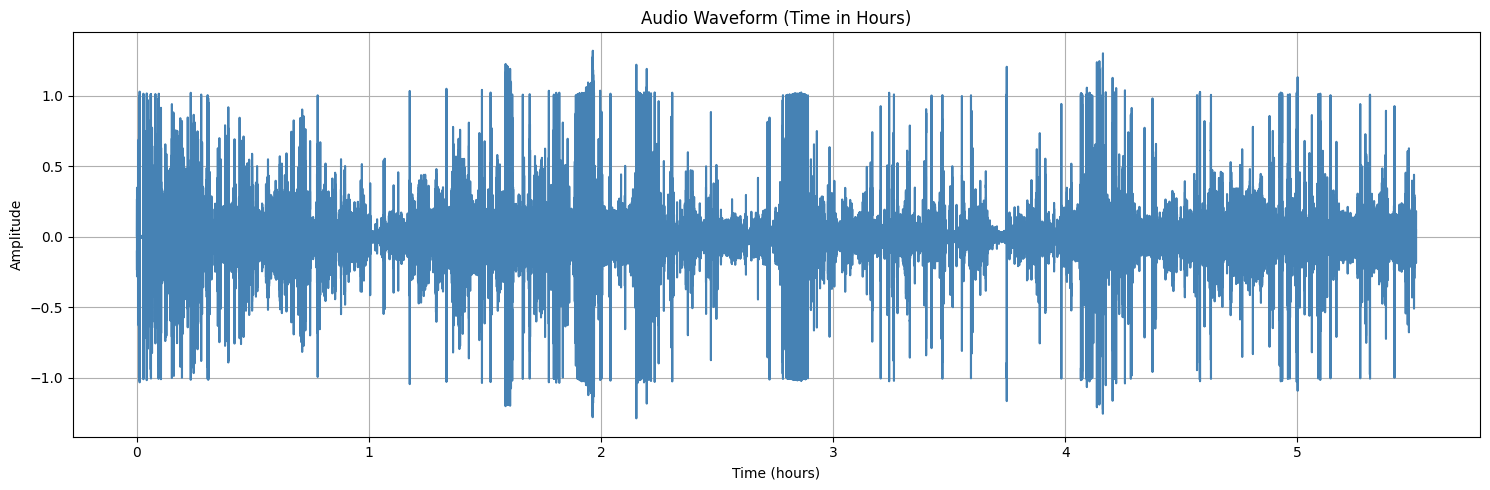

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Path to your MP3 file
audio_file = op.join(DATA_PATH, 'audio', 'ses-ceremony2','audio_ses-ceremony2_task-psilo_audio.mp3')

# Load the audio file with its original sampling rate
audio, sr = librosa.load(audio_file, sr=None)

# Calculate the duration in seconds and then convert to hours
duration_seconds = len(audio) / sr
duration_hours = duration_seconds / 3600

# Create a time axis in hours
time_hours = np.linspace(0, duration_hours, num=len(audio))

# Create a wide figure (15 inches wide by 5 inches tall)
plt.figure(figsize=(15, 5))

# Plot the waveform with time in hours on the x-axis
plt.plot(time_hours, audio, color='steelblue')
plt.xlabel("Time (hours)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform (Time in Hours)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Load EEG file and plot in wide form
eeg_file = op.join(DATA_PATH, 'sub-01', 'ses-ceremony2', 'eeg', 'sub-01_ses-ceremony2_task-psilo_eeg.edf')
raw = mne.io.read_raw_edf(eeg_file)
#raw.plot(scalings='auto', duration=10, n_channels=64, title='EEG Data (Wide Form)')
#plt.show()

#%matplotlib qt
#raw.plot(scalings='auto', duration=10, n_channels=64, title='EEG Data (Wide Form)')
raw.info['ch_names']


Extracting EDF parameters from /media/hyruuk/Commons/GitHub/mushroom_hyperscanning/data/bidsified/sub-01/ses-ceremony2/eeg/sub-01_ses-ceremony2_task-psilo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


['EEG P3-Pz',
 'EEG C3-Pz',
 'EEG F3-Pz',
 'EEG Fz-Pz',
 'EEG F4-Pz',
 'EEG C4-Pz',
 'EEG P4-Pz',
 'EEG Cz-Pz',
 'CM',
 'EEG A1-Pz',
 'EEG Fp1-Pz',
 'EEG Fp2-Pz',
 'EEG T3-Pz',
 'EEG T5-Pz',
 'EEG O1-Pz',
 'EEG O2-Pz',
 'EEG X3:-Pz',
 'EEG X2:-Pz',
 'EEG F7-Pz',
 'EEG F8-Pz',
 'EEG X1:ECG-Pz',
 'EEG A2-Pz',
 'EEG T6-Pz',
 'EEG T4-Pz',
 'Pz',
 'Trigger',
 'Event']

/tmp/ipykernel_13359/2488255875.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/hyruuk/mambaforge/envs/mush_hs/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


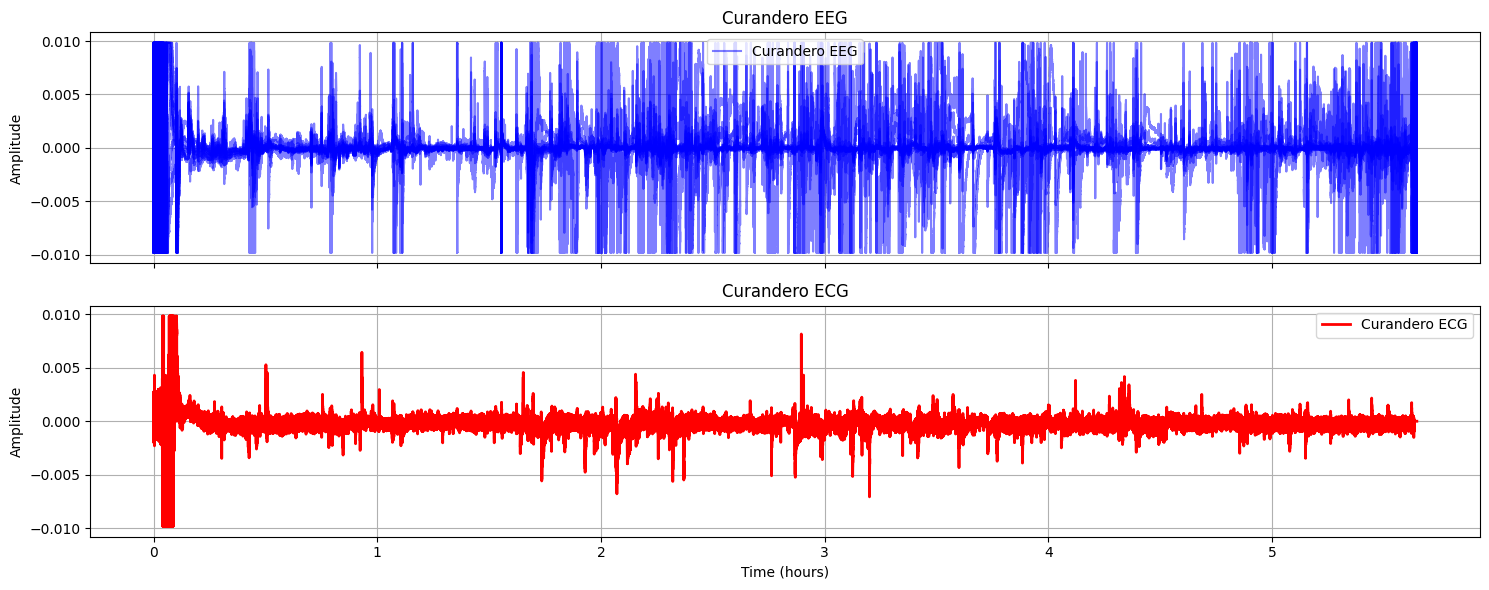

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `raw` is your MNE Raw object already loaded.
# For example:
# eeg_file = op.join(DATA_PATH, 'sub-01', 'ses-ceremony2', 'eeg', 'sub-01_ses-ceremony2_task-psilo_eeg.edf')
# raw = mne.io.read_raw_edf(eeg_file, preload=True)

# Get the list of channel names
all_channels = raw.ch_names

# 1. Select all EEG channels (channels starting with "EEG") excluding the ECG channel.
eeg_channels = [ch for ch in all_channels if ch.startswith("EEG") and ch != "EEG X1:ECG-Pz" and ch != "EEG A1-Pz" and ch != "EEG A2-Pz" and ch != 'EEG X3:-Pz' and ch != 'EEG X2:-Pz']
eeg_channels = eeg_channels[:5]  # Select only the first 10 EEG channels

# 2. Extract EEG data and corresponding time vector.
#    eeg_data shape: (n_eeg_channels, n_samples)
eeg_data, times = raw[eeg_channels, :]

# 3. Extract the ECG channel ("EEG X1:ECG-Pz") separately.
ecg_channel = "EEG X1:ECG-Pz"
ecg_data, times = raw[[ecg_channel], :]

# 4. Convert the time axis from seconds to hours.
times_hours = times / 3600

# 5. Create two subplots (stacked vertically) that share the x-axis.
fig, axs = plt.subplots(2, 1, figsize=(15, 6), sharex=True)

# Plot EEG channels on the first subplot.
for idx, channel_data in enumerate(eeg_data):
    axs[0].plot(times_hours, channel_data,
                color="blue",
                alpha=0.5,
                label="Curandero EEG" if idx == 0 else None)
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Curandero EEG")
axs[0].legend()
axs[0].grid(True)

# Plot the ECG channel on the second subplot.
axs[1].plot(times_hours, ecg_data[0],
            color="red",
            linewidth=2,
            label="Curandero ECG")
axs[1].set_xlabel("Time (hours)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Curandero ECG")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# A : Ceremony timeline
# B : Audio waveform
# C : Curandero EEG data
# D : Participant EEG data
# E : Curandero ECG data
# F : Participant ECG data
# G : Apprentice ECG data